# Gold extraction from gold ore

Goal: develop machine learning algorithm for gold extraction efficiency prediction using the extraction and processing parameters data.

## Data Preparation

Upload the data and the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
matplotlib inline

In [3]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_all = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Data review

In [4]:
def get_to_know_your_data(df, df_name):
    for e in range(len(df)):
        
        element = df[e]
        print(f'NAME: {df_name[e]}')
        print("-------------------")
        print('Dataset review')
        display(element.head())
        print("-----")
        print('Short summary')
        display(element.info())
        print("-----")
        print('Statistics')
        display(element.describe())
        print("-----")
        print('Amount of duplicates')
        display(element.duplicated().sum())
        print("-----")
        print('Percentage of missing data in features')
        display(element.isnull().mean().sort_values(ascending=False).head(50))
        print()
df = [data_train, data_test, data_all]
df_name = ['data_train', 'data_test', 'data_all']
get_to_know_your_data(df, df_name)

NAME: data_train
-------------------
Dataset review


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


-----
Short summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.dep

None

-----
Statistics


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


-----
Amount of duplicates


0

-----
Percentage of missing data in features


secondary_cleaner.output.tail_sol                     0.113436
rougher.state.floatbank10_e_air                       0.030815
rougher.input.floatbank11_xanthate                    0.030249
primary_cleaner.output.concentrate_sol                0.020213
secondary_cleaner.state.floatbank2_a_air              0.015337
final.output.concentrate_sol                          0.014913
rougher.input.feed_size                               0.010177
final.output.tail_pb                                  0.007068
rougher.input.feed_pb                                 0.007068
primary_cleaner.input.xanthate                        0.007068
primary_cleaner.output.concentrate_pb                 0.006078
rougher.input.feed_sol                                0.005513
primary_cleaner.output.tail_sol                       0.003251
rougher.input.floatbank11_sulfate                     0.002544
primary_cleaner.input.depressant                      0.002262
rougher.input.floatbank10_sulfate                     0


NAME: data_test
-------------------
Dataset review


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


-----
Short summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-nul

None

-----
Statistics


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


-----
Amount of duplicates


0

-----
Percentage of missing data in features


rougher.input.floatbank11_xanthate            0.004726
rougher.input.feed_sol                        0.003970
secondary_cleaner.state.floatbank3_a_air      0.001701
rougher.input.floatbank11_sulfate             0.001512
primary_cleaner.input.depressant              0.000945
rougher.input.floatbank10_sulfate             0.000945
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.xanthate                0.000756
secondary_cleaner.state.floatbank2_a_air      0.000567
rougher.input.feed_rate                       0.000567
secondary_cleaner.state.floatbank2_b_air      0.000378
rougher.input.feed_size                       0.000189
secondary_cleaner.state.floatbank6_a_level    0.000000
rougher.input.floatbank10_xanthate            0.000000
rougher.input.feed_au                         0.000000
rougher.input.feed_pb                         0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.st


NAME: data_all
-------------------
Dataset review


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


-----
Short summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.dep

None

-----
Statistics


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


-----
Amount of duplicates


0

-----
Percentage of missing data in features


secondary_cleaner.output.tail_sol                     0.089922
rougher.input.floatbank11_xanthate                    0.023304
rougher.state.floatbank10_e_air                       0.022429
primary_cleaner.output.concentrate_sol                0.019034
secondary_cleaner.state.floatbank2_a_air              0.011317
final.output.concentrate_sol                          0.010854
rougher.input.feed_size                               0.007459
primary_cleaner.output.concentrate_pb                 0.005967
primary_cleaner.input.xanthate                        0.005350
final.output.tail_pb                                  0.005196
rougher.input.feed_pb                                 0.005144
rougher.input.feed_sol                                0.005093
primary_cleaner.output.tail_sol                       0.003189
rougher.input.floatbank11_sulfate                     0.002263
primary_cleaner.input.depressant                      0.001903
rougher.input.floatbank10_sulfate                     0

Ore processing efficiency calculation check ("rougher.output.recovery" feature)

In [5]:
data_train['rougher_output_recovery_calc'] = (data_train['rougher.output.concentrate_au'] * (
    data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au']) / 
                                              (data_train['rougher.input.feed_au'] * 
                                              (data_train['rougher.output.concentrate_au'] - 
                                              (data_train['rougher.output.tail_au'])))) * 100

In [6]:
mae_rougher = mean_absolute_error(data_train['rougher.output.recovery'], data_train['rougher_output_recovery_calc'])

In [7]:
mae_rougher

9.682896147825551e-15

MAE value is low, ore processing efficiency is calculated correctly 

In [8]:
columns_train = data_train.columns
columns_test = data_test.columns

In [9]:
columns_train_set = set(data_train.columns)
columns_test_set = set(data_test.columns)

In [10]:
print(columns_train_set & columns_test_set)

{'primary_cleaner.input.xanthate', 'secondary_cleaner.state.floatbank2_b_level', 'primary_cleaner.state.floatbank8_d_air', 'rougher.state.floatbank10_e_air', 'primary_cleaner.input.depressant', 'primary_cleaner.state.floatbank8_a_air', 'secondary_cleaner.state.floatbank2_b_air', 'rougher.state.floatbank10_c_air', 'rougher.input.feed_au', 'primary_cleaner.input.feed_size', 'primary_cleaner.state.floatbank8_b_air', 'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank4_a_level', 'rougher.state.floatbank10_c_level', 'primary_cleaner.state.floatbank8_b_level', 'rougher.state.floatbank10_d_air', 'primary_cleaner.state.floatbank8_c_air', 'secondary_cleaner.state.floatbank5_a_air', 'rougher.state.floatbank10_a_level', 'rougher.input.feed_rate', 'secondary_cleaner.state.floatbank3_b_air', 'rougher.input.floatbank11_xanthate', 'secondary_cleaner.state.floatbank5_b_air', 'rougher.input.feed_pb', 'rougher.input.feed_ag', 'rougher.input.floatbank10_xanthate', 'secondary_cl

In [11]:
mutual_columns = []
for element in columns_train:
    if element in columns_test:
        mutual_columns.append(element)

In [12]:
len(mutual_columns)

53

In [13]:
columns_missing_in_test = []
for element in columns_train:
    if element not in columns_test:
        columns_missing_in_test.append(element)

In [14]:
columns_missing_in_test

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [15]:
missing_train_features = data_train.loc[:, columns_missing_in_test]

In [16]:
missing_train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 35 columns):
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.output.concentrate_ag                 14149 non-null float64
primary_cleaner.output.concentrate_pb                 14063 non-null float64
primary_cleaner.output.concentrate_sol      

All features unavailable in the test set are numeric features. These features reflect metal concentrations after various stages of ore processing as well as in final tailings.

Remove target feature for further analysis. In order to train the model only the features available in the test are kept in the training set.

In [17]:
target_train_rougher = data_train['rougher.output.recovery']

In [18]:
target_train_final = data_train['final.output.recovery']

In [19]:
data_train_for_model = data_train.drop(columns_missing_in_test, axis=1)

Add target features to test dataset.

In [20]:
data_test_with_targets = pd.merge(data_test, data_all, how="inner", on='date')

In [21]:
data_test_with_targets.shape

(5290, 139)

In [22]:
target_test_rougher = data_test_with_targets['rougher.output.recovery']

In [23]:
target_test_final = data_test_with_targets['final.output.recovery']

In [24]:
data_train_for_model = data_train_for_model.drop('date', axis=1)

In [25]:
data_test = data_test.drop('date', axis=1)

Data review shows missing values in multiple features. They require processing.

Missing values are filled in using ffill.

In [26]:
data_train_for_model.ffill(inplace=True)

In [27]:
data_test.ffill(inplace=True)

###### Summary 

Data is preprocessed, missing values are filled in. Data is ready for further processing. Calculations of ore processing efficiency are checked. Calculations are correct.

## Data Analysis

Make graphs of metal concentration depending on the process stage.

In [28]:
#Gold
conc_au = [data_train['rougher.output.concentrate_au'],  
           data_train['primary_cleaner.output.concentrate_au'],
          data_train['final.output.concentrate_au']]

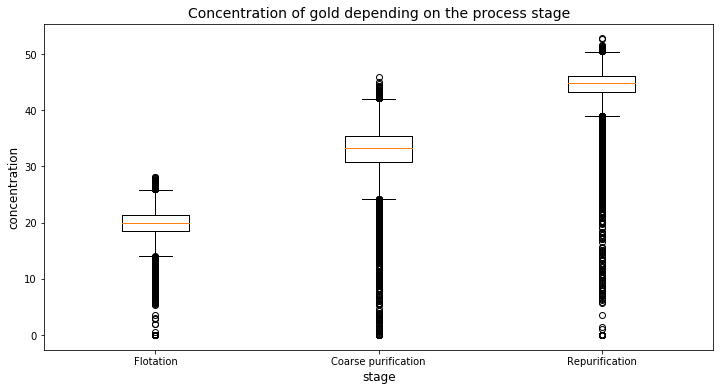

In [29]:
plt.figure(figsize=(12, 6))
plt.boxplot(conc_au);

plt.title('Concentration of gold depending on the process stage',fontsize=14) 
plt.xlabel('stage',fontsize=12)
plt.ylabel('concentration',fontsize=12);
fig = plt.axes()

fig.set_xticklabels(['Flotation', 'Coarse purification', 'Repurification'])
plt.show()

In [30]:
#Silver
conc_ag = [data_train['rougher.output.concentrate_ag'],  
           data_train['primary_cleaner.output.concentrate_ag'],
           data_train['final.output.concentrate_ag'].dropna()]

In [31]:
data_train['final.output.concentrate_ag'].isna().sum()

1

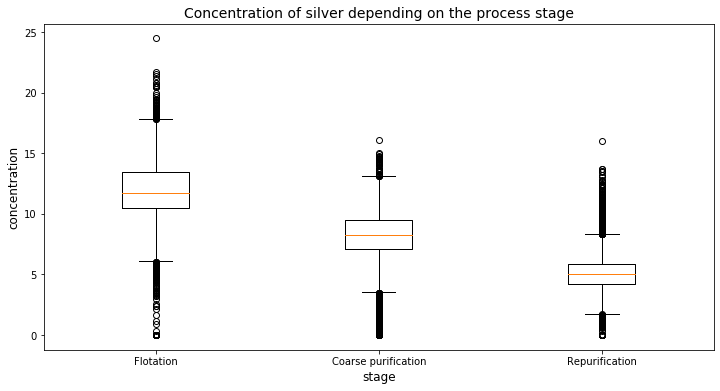

In [32]:
plt.figure(figsize=(12, 6));
plt.boxplot(conc_ag);
plt.title('Concentration of silver depending on the process stage',fontsize=14);
plt.xlabel('stage',fontsize=12);
plt.ylabel('concentration',fontsize=12);
fig = plt.axes()
fig.set_xticklabels(['Flotation', 'Coarse purification', 'Repurification'])
plt.show()

In [33]:
#Lead
conc_pb = [data_train['rougher.output.concentrate_pb'],  
           data_train['primary_cleaner.output.concentrate_pb'].dropna(),
           data_train['final.output.concentrate_pb'].dropna()]

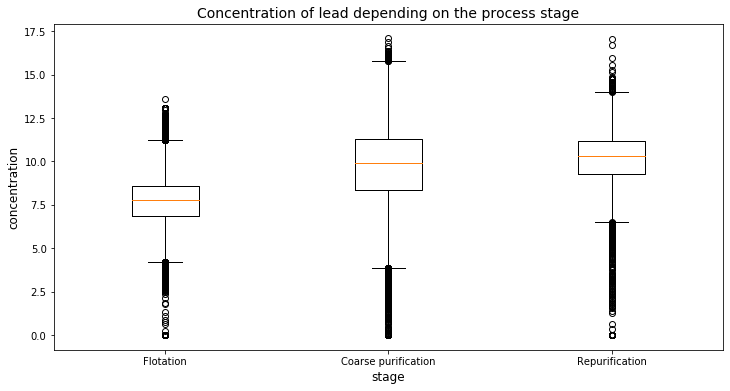

In [34]:
plt.figure(figsize=(12, 6))
plt.boxplot(conc_pb);
plt.title('Concentration of lead depending on the process stage',fontsize=14);
plt.xlabel('stage',fontsize=12);
plt.ylabel('concentration',fontsize=12);
fig = plt.axes();
fig.set_xticklabels(['Flotation', 'Coarse purification', 'Repurification'])
plt.show()

The graphs show average concentration of gold increases after each subsequent processing stage and concentration of silver decreases. Average concentration of lead increases after floatation and remains about the same after further stages.

Comparison of raw material crystals (feed_size) distribution for training and test sets.

In [35]:
feed_size_rougher_train = data_train_for_model['rougher.input.feed_size']
feed_size_rougher_test = data_test['rougher.input.feed_size']
feed_size_primary_train = data_train_for_model['primary_cleaner.input.feed_size']
feed_size_primary_test = data_test['primary_cleaner.input.feed_size']

Text(0.5, 1.0, 'Raw material crystals (feed_size) distribution incoming to floatation stage')

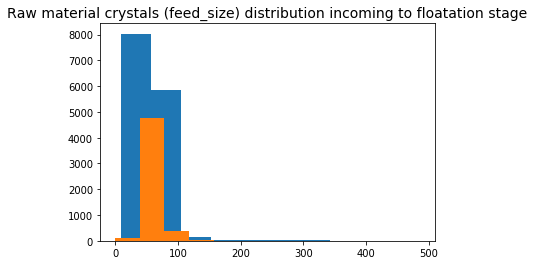

In [36]:
plt.hist(feed_size_rougher_train)
plt.hist(feed_size_rougher_test);
plt.title('Raw material crystals (feed_size) distribution incoming to floatation stage',fontsize=14)

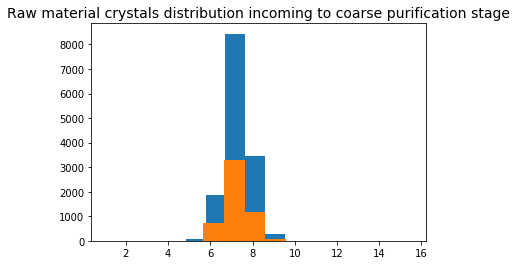

In [37]:
plt.hist(feed_size_primary_train)
plt.hist(feed_size_primary_test);
plt.title('Raw material crystals distribution incoming to coarse purification stage',fontsize=14);

The histograms show that crystal size distribution is similar for both training and test sets.

Metal concentration depending on processing stage.

In [38]:
total_conc = []
for (item1, item2, item3) in zip(conc_au, conc_ag, conc_pb):
    total_conc.append(item1+item2+item3)

In [39]:
len(total_conc)

3

In [40]:
total_conc = [total_conc[0].dropna(), total_conc[1].dropna(), total_conc[2].dropna()]

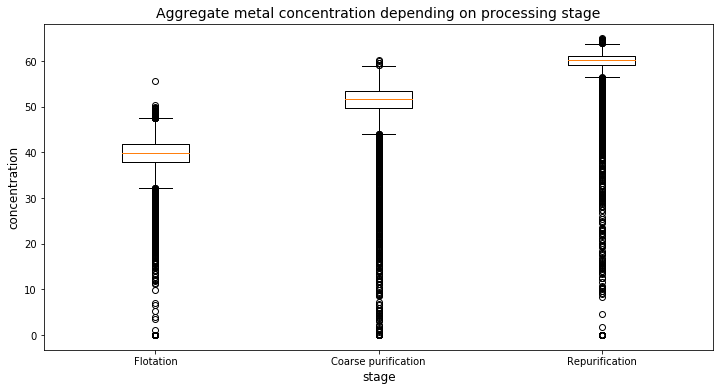

In [41]:
plt.figure(figsize=(12, 6))
plt.boxplot(total_conc);
plt.title('Aggregate metal concentration depending on processing stage',fontsize=14)
plt.xlabel('stage',fontsize=12)
plt.ylabel('concentration',fontsize=12);
fig = plt.axes();
fig.set_xticklabels(['Flotation', 'Coarse purification', 'Repurification'])
plt.show()

###### Summary 

Metal concentration depending on different processing stage is explored. Grain size distributions for both training and test sets are compared.

## Model

Division by zero may occur in smape calculation if true value is equal to predicted value and is equal to zero. This case may be problematic. Create function dva_zero() to check for such values.

In [42]:
def dva_zero(target, probabilities):
    for i in range(len(target)):
        if target[i] == 0 and probabilities[i] == 0:
            print('target and probabilities are equal')

smape calculation function

In [43]:
def smape(target, probabilities):
    results = abs(target - probabilities) / ((abs(target) + abs(probabilities)) / 2)
    results = results.fillna(0)
    sMAPE = sum(results) / len(target) * 100
    return sMAPE

Linear regression and random forest models

In [44]:
model1 = LinearRegression(normalize=True)

In [45]:
model2 = RandomForestRegressor(random_state=12345)

Hyper-parameter selection for random forest with grid search.

In [46]:
param_grid = {'max_depth':[2, 4, ],
              'n_estimators':[5, 10, 15],
              'n_jobs': [-1]}

In [47]:
cv_grid = GridSearchCV(model2, param_grid, cv=3, verbose=2)
cv_grid_final = GridSearchCV(model2, param_grid, cv=3, verbose=2)

Split set to training and validation sets for rougher stage.

In [48]:
features_train_rougher, features_valid_rougher, target_train_rougher, target_valid_rougher = train_test_split(data_train_for_model, target_train_rougher, test_size=0.25, random_state=12345)

Split set to training and validation for final stage.

In [49]:
features_train_final, features_valid_final, target_train_final, target_valid_final = train_test_split(data_train_for_model, target_train_final, test_size=0.25, random_state=12345)

In [50]:
model1.fit(features_train_rougher, target_train_rougher)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [51]:
model1_predict_rougher = model1.predict(features_valid_rougher)

In [52]:
smape_valid_rougher_model1 = smape(target_valid_rougher.reset_index(drop=True), model1_predict_rougher)

In [53]:
smape_valid_rougher_model1

10.713201943742215

In [54]:
model1.fit(features_train_final, target_train_final)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [55]:
model1_predict_final = model1.predict(features_valid_final)

In [56]:
smape_valid_final_model1 = smape(target_valid_final.reset_index(drop=True), model1_predict_final)

In [57]:
result_smape_lin_reg = 0.25 * smape_valid_rougher_model1 + 0.75 * smape_valid_final_model1

In [58]:
result_smape_lin_reg

9.125553722762907

Final sMAPE for linear regression is 9.13. Same metric calculation for random forest

In [59]:
cv_grid.fit(features_train_rougher, target_train_rougher)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] max_depth=2, n_estimators=5, n_jobs=-1 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........... max_depth=2, n_estimators=5, n_jobs=-1, total=   0.3s
[CV] max_depth=2, n_estimators=5, n_jobs=-1 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ........... max_depth=2, n_estimators=5, n_jobs=-1, total=   0.2s
[CV] max_depth=2, n_estimators=5, n_jobs=-1 ..........................
[CV] ........... max_depth=2, n_estimators=5, n_jobs=-1, total=   0.2s
[CV] max_depth=2, n_estimators=10, n_jobs=-1 .........................
[CV] .......... max_depth=2, n_estimators=10, n_jobs=-1, total=   0.4s
[CV] max_depth=2, n_estimators=10, n_jobs=-1 .........................
[CV] .......... max_depth=2, n_estimators=10, n_jobs=-1, total=   0.4s
[CV] max_depth=2, n_estimators=10, n_jobs=-1 .........................
[CV] .......... max_depth=2, n_estimators=10, n_jobs=-1, total=   0.4s
[CV] max_depth=2, n_estimators=15, n_jobs=-1 .........................
[CV] .......... max_depth=2, n_estimators=15, n_jobs=-1, total=   0.6s
[CV] max_depth=2, n_estimators=15, n_jobs=-1 .........................
[CV] .......... max_depth=2, n_estimators=15, n_jobs=-1, total=   0.6s
[CV] max_depth=2, n_estimators=15, n_jobs=-1 .........................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   11.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False,
                                             random_state=12345, verbose=0,
                                             warm_start=False),
             iid='warn', n_jobs=None,
          

In [60]:
cv_grid.best_params_

{'max_depth': 4, 'n_estimators': 15, 'n_jobs': -1}

In [61]:
model2_predict_rougher = cv_grid.predict(features_valid_rougher)

In [62]:
cv_grid_final.fit(features_train_final, target_train_final)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] max_depth=2, n_estimators=5, n_jobs=-1 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........... max_depth=2, n_estimators=5, n_jobs=-1, total=   0.2s
[CV] max_depth=2, n_estimators=5, n_jobs=-1 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ........... max_depth=2, n_estimators=5, n_jobs=-1, total=   0.2s
[CV] max_depth=2, n_estimators=5, n_jobs=-1 ..........................
[CV] ........... max_depth=2, n_estimators=5, n_jobs=-1, total=   0.2s
[CV] max_depth=2, n_estimators=10, n_jobs=-1 .........................
[CV] .......... max_depth=2, n_estimators=10, n_jobs=-1, total=   0.4s
[CV] max_depth=2, n_estimators=10, n_jobs=-1 .........................
[CV] .......... max_depth=2, n_estimators=10, n_jobs=-1, total=   0.4s
[CV] max_depth=2, n_estimators=10, n_jobs=-1 .........................
[CV] .......... max_depth=2, n_estimators=10, n_jobs=-1, total=   0.4s
[CV] max_depth=2, n_estimators=15, n_jobs=-1 .........................
[CV] .......... max_depth=2, n_estimators=15, n_jobs=-1, total=   0.6s
[CV] max_depth=2, n_estimators=15, n_jobs=-1 .........................
[CV] .......... max_depth=2, n_estimators=15, n_jobs=-1, total=   0.6s
[CV] max_depth=2, n_estimators=15, n_jobs=-1 .........................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   11.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False,
                                             random_state=12345, verbose=0,
                                             warm_start=False),
             iid='warn', n_jobs=None,
          

In [63]:
model2_predict_final = cv_grid_final.predict(features_valid_final)

In [64]:
smape_valid_final_model2 = smape(target_valid_final.reset_index(drop=True), model2_predict_final)

In [65]:
smape_valid_rougher_model2 = smape(target_valid_rougher.reset_index(drop=True), model2_predict_rougher)

In [66]:
result_smape_rand_forest = 0.25 * smape_valid_rougher_model2 + 0.75 * smape_valid_final_model2

In [67]:
result_smape_rand_forest

8.971390189669433

Final sMAPE for random forest is 7.74. Check model's performance with the test set.

In [68]:
model2_predict_rougher_test = cv_grid.predict(data_test)

In [69]:
model2_predict_final_test = cv_grid_final.predict(data_test)

In [70]:
smape_test_rougher_model2 = smape(target_test_rougher, model2_predict_rougher_test)

In [71]:
smape_test_final_model2 = smape(target_test_final, model2_predict_final_test)

In [72]:
result_smape_rand_forest_test = 0.25 * smape_test_rougher_model2 + 0.75 * smape_test_final_model2

In [73]:
result_smape_rand_forest_test

9.70933772640639

## Conclusion

Metal concentration depending on different processing stage is analyzed. Average concentration of gold increases after each subsequent processing stage and concentration of silver decreases. Average concentration of lead increases after floatation and remains about the same after further stages.

Gold extraction from gold ore coefficient prediction model is chosen and trained with sMAPE = 7.74 on validation data.

Test set predictions are made.